In [ ]:
# 學習

# 1.unicode、glob、string模組

# 2.建立NN的過程

#   1)設定input、output數
#   input: a-zA-z.,;'共56維的長向量表示、input維數
#   output: 18維的長向量表示(18種語言)、Label數

#   2)__init__：設定layer的模型、特徵傳遞的維度

#   3)設定forward layers傳遞的實體、串聯layers

# 3.torch.cat() 依維度相加

# 4. .topk(k) 返回前k大數值的 數值, indices
# 可用 top_i.item()取出

# 5.NLLLoss 是 CrossEntropy的過程
#   1)Softmax把特徵投射到0~1之間，總合為1
#   2)log/ln 把 0~1 投射到 負無窮大~0
#   3)NLLLoss就是把上述輸出陣列與Label(正解)對應的該值取出來、去掉負號、求均值
# 合成一步>>>CE

# 6.trainNN的過程
#   1)歸零梯度值：呼叫 model.zero_grad()
#   2)設定loss並呼叫 loss.backward()
#   3)更新參數
#    for p in rnn.parameters():
#      p.data.add_(p.grad.data, alpha=-learning_rate)

# 7.evaluate不需要zero_grad、backward、更新參數

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)
print(findFiles('/content/drive/My Drive/space_Colab/data/data/names/*.txt'))

import unicodedata
import string
all_letters = string.ascii_letters + ".,;'"
n_letters = len(all_letters)

def unicodeToAscii(s):
  return ''.join(c for c in unicodedata.normalize('NFD',s)
  if unicodedata.category(c)!='Mn'
  and c in all_letters)

print(unicodeToAscii('Ślusàrski'))

category_lines = {}
all_categories = []

def readLines(filename):
  lines = open(filename, encoding='utf-8').read().strip().split('\n')
  return [unicodeToAscii(line) for line in lines]

for filename in findFiles('/content/drive/My Drive/space_Colab/data/data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)  

['/content/drive/My Drive/space_Colab/data/data/names/Russian.txt', '/content/drive/My Drive/space_Colab/data/data/names/Vietnamese.txt', '/content/drive/My Drive/space_Colab/data/data/names/Portuguese.txt', '/content/drive/My Drive/space_Colab/data/data/names/Arabic.txt', '/content/drive/My Drive/space_Colab/data/data/names/Scottish.txt', '/content/drive/My Drive/space_Colab/data/data/names/Italian.txt', '/content/drive/My Drive/space_Colab/data/data/names/Chinese.txt', '/content/drive/My Drive/space_Colab/data/data/names/Dutch.txt', '/content/drive/My Drive/space_Colab/data/data/names/Czech.txt', '/content/drive/My Drive/space_Colab/data/data/names/English.txt', '/content/drive/My Drive/space_Colab/data/data/names/Korean.txt', '/content/drive/My Drive/space_Colab/data/data/names/Irish.txt', '/content/drive/My Drive/space_Colab/data/data/names/Japanese.txt', '/content/drive/My Drive/space_Colab/data/data/names/Greek.txt', '/content/drive/My Drive/space_Colab/data/data/names/Spanish.tx

In [ ]:
print(n_categories,n_letters)
print(n_letters)
print(category_lines)


18 56
56
{'Russian': ['Ababko', 'Abaev', 'Abagyan', 'Abaidulin', 'Abaidullin', 'Abaimoff', 'Abaimov', 'Abakeliya', 'Abakovsky', 'Abakshin', 'Abakumoff', 'Abakumov', 'Abakumtsev', 'Abakushin', 'Abalakin', 'Abalakoff', 'Abalakov', 'Abaleshev', 'Abalihin', 'Abalikhin', 'Abalkin', 'Abalmasoff', 'Abalmasov', 'Abaloff', 'Abalov', 'Abamelek', 'Abanin', 'Abankin', 'Abarinoff', 'Abarinov', 'Abasheev', 'Abashev', 'Abashidze', 'Abashin', 'Abashkin', 'Abasov', 'Abatsiev', 'Abaturoff', 'Abaturov', 'Abaza', 'Abaziev', 'Abbakumov', 'Abbakumovsky', 'Abbasov', 'AbdankKossovsky', 'Abdeev', 'Abdildin', 'Abdrahimoff', 'Abdrahimov', 'Abdrahmanoff', 'Abdrahmanov', 'Abdrakhimoff', 'Abdrakhimov', 'Abdrakhmanoff', 'Abdrakhmanov', 'Abdrashitoff', 'Abdrashitov', 'Abdrazakoff', 'Abdrazakov', 'Abdulaev', 'Abdulatipoff', 'Abdulatipov', 'Abdulazizoff', 'Abdulazizov', 'Abdulbasiroff', 'Abdulbasirov', 'Abdulbekoff', 'Abdulbekov', 'Abdulgapuroff', 'Abdulgapurov', 'Abdulgaziev', 'Abdulhabiroff', 'Abdulhabirov', 'Abdulin

In [ ]:
import torch
# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
  return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
  tensor = torch.zeros(1, n_letters)
  tensor[0][letterToIndex(letter)] = 1
  return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
  tensor = torch.zeros(len(line), 1, n_letters)
  for li, letter in enumerate(line):
    tensor[li][0][letterToIndex(letter)] = 1
  return tensor

print(letterToTensor('J'))
print(lineToTensor('Jones'))



tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

1.設定input、output數 <br>
input: a-zA-z.,;'共56維的長向量表示 <br>
output: 18維的長向量表示(18種語言) <br>
<br>
2.layer設定特徵傳遞的維度<br>
<br>
3.設定forward函式傳遞


In [ ]:
import torch.nn as nn
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()
    self.hidden_size =hidden_size
    self.i2h = nn.Linear(input_size+hidden_size,hidden_size)
    self.i2o = nn.Linear(input_size+hidden_size,output_size)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, input, hidden):
    combined = torch.cat((input, hidden), 1)
    hidden = self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)
    return output, hidden

  def initHidden(self):
    return torch.zeros(1, self.hidden_size)

n_hidden = 128 #n_categories = 18種語言,n_letters = 56 a-zA-Z.,;
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9540, -2.7976, -2.9691, -2.8411, -3.0060, -2.8764, -2.8561, -2.8675,
         -2.8579, -2.9464, -2.8559, -2.9938, -2.8093, -2.9306, -2.8326, -2.9240,
         -2.8263, -2.9167]], grad_fn=<LogSoftmaxBackward>)


In [ ]:
def categoryFromOutput(output):
  top_n, top_i = output.topk(1)
  category_i = top_i[0].item()
  return all_categories[category_i], category_i

print(categoryFromOutput(output))

tensor([[-2.7976]], grad_fn=<TopkBackward>) 1
('Vietnamese', 1)


We will also want a quick way to get a training example (a name and its language):



In [ ]:
import random
def randomChoice(l):
  return l[random.randint(0, len(l)-1)]

def randomTrainingExample():
  category = randomChoice(all_categories)
  line = randomChoice(category_lines[category])
  category_tensor = torch.tensor([all_categories.index(category)], dtype = torch.long)
  line_tensor = lineToTensor(line)
  return category, line, category_tensor, line_tensor
for i in range(10):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  print('category= ', category, '/line =', line)

category=  Czech /line = Uerling
category=  Korean /line = Shin
category=  Dutch /line = Tillens
category=  Italian /line = Trudu
category=  Greek /line = Forakis
category=  German /line = Kruse
category=  Italian /line = Piraino
category=  Arabic /line = Sabbag
category=  Chinese /line = Sha
category=  Korean /line = Yi


In [ ]:
criterion = nn.NLLLoss()

In [ ]:
# Each loop of training will:

# Create input and target tensors
# Create a zeroed initial hidden state
# Read each letter in and
# Keep hidden state for next letter
# Compare final output to target
# Back-propagate
# Return the output and loss

learning_rate = 0.005
# If you set this too high, it might explode. If too low, it might not learn
def train(category_tensor, line_tensor):
  hidden = rnn.initHidden()

  rnn.zero_grad()

  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  loss = criterion(output, category_tensor)
  loss.backward()

  for p in rnn.parameters():
    p.data.add_(p.grad.data, alpha=-learning_rate)

  return output,loss.item()

In [ ]:
import time,math

n_iters = 100000
print_every = 5000
plot_every = 1000

current_loss=0
all_losses=[]

def timeSince(since):
  now = time.time()
  s = now - since
  m = math.floor(s/60)
  s -= m * 60
  return '%dm %ds' %(m,s)

start = time.time()

for iter in range(1,n_iters+1):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  output, loss = train(category_tensor, line_tensor)
  current_loss += loss

  if iter % print_every ==0:
    guess, guess_i = categoryFromOutput(output)
    correct = '✓' if guess == category else  '✗ (%s)' % category
    print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter/n_iters*100, timeSince(start), loss, line, guess, correct))

  if iter % plot_every ==0:
    all_losses.append(current_loss/plot_every)
    current_loss = 0


tensor([[-2.0437]], grad_fn=<TopkBackward>) 9
5000 5% (0m 6s) 3.4736 Budny / English ✗ (Polish)
tensor([[-1.3397]], grad_fn=<TopkBackward>) 10
10000 10% (0m 12s) 1.5981 Chen / Korean ✗ (Chinese)
tensor([[-0.6131]], grad_fn=<TopkBackward>) 5
15000 15% (0m 18s) 0.6131 Benini / Italian ✓
tensor([[-0.4590]], grad_fn=<TopkBackward>) 2
20000 20% (0m 24s) 1.7922 Basurto / Portuguese ✗ (Italian)
tensor([[-0.9057]], grad_fn=<TopkBackward>) 1
25000 25% (0m 30s) 0.9057 Vo / Vietnamese ✓
tensor([[-1.9879]], grad_fn=<TopkBackward>) 11
30000 30% (0m 37s) 2.0364 Mackay / Irish ✗ (Scottish)
tensor([[-0.3242]], grad_fn=<TopkBackward>) 13
35000 35% (0m 43s) 0.3242 Alexandropoulos / Greek ✓
tensor([[-0.9137]], grad_fn=<TopkBackward>) 14
40000 40% (0m 50s) 2.9085 Gouveia / Spanish ✗ (Portuguese)
tensor([[-1.5767]], grad_fn=<TopkBackward>) 16
45000 45% (0m 56s) 1.7479 AuYong / French ✗ (Chinese)
tensor([[-0.4659]], grad_fn=<TopkBackward>) 5
50000 50% (1m 2s) 5.3517 Gravari / Italian ✗ (Greek)
tensor([[-0.3

[1.9720114742964505, 1.9228105142377316, 1.8490045523941516, 1.8535197540149093, 1.8784043625034392, 1.7976868921741844, 1.8289566696668045, 1.7596663873363285, 1.766042112893425, 1.719752058064565, 1.7244934787414967, 1.7311685743685812, 1.7240940256789328, 1.686829727799195, 1.6792247978560626, 1.6329499276783317, 1.64978993964009, 1.602089190384373, 1.5796261399083305, 1.6172209927716759, 1.5506608339119703, 1.6457286982191726, 1.645435963915661, 1.6015505586601795, 1.6572286983281375, 1.5298276056312026, 1.5283187262993305, 1.5518957001585514, 1.4760993310478516, 1.4684791208950336, 1.515394405138446, 1.5386228922223673, 1.4714815726785455, 1.514729359443998, 1.4952166106095537, 1.576631169350585, 1.5017570761181414, 1.437951652685646, 1.476948643980082, 1.4082613304951228, 1.4897592780580744, 1.422726010043407, 1.388891573388828, 1.468024941432057, 1.3930177929182537, 1.4159232155176578, 1.4214111890364438, 1.4092998784779047, 1.3940532156601548, 1.3818864375143312, 1.413642715717

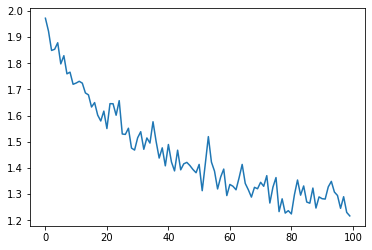

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
print(all_losses)
plt.figure()
plt.plot(all_losses)

In [ ]:
# To calculate the confusion matrix a bunch of samples are run through the network with evaluate(), which is the same as train() minus the backprop.
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

def evaluate(line_tensor):
  hidden = rnn.initHidden()

  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  return output

for i in range(n_confusion):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  output = evaluate(line_tensor)
  guess, guess_i = categoryFromOutput(output)
  category_i = all_categories.index(category)
  confusion[category_i][guess_i] += 1

for i in range(n_categories):
  confusion[i] = confusion[i] / confusion[i].sum()




()

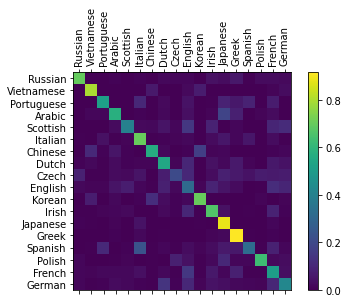

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

()


In [ ]:
def predict(input_line, n_predictions = 3):
  print('\n> %s' % input_line)
  with torch.no_grad():
    output = evaluate(lineToTensor(input_line))

    topv, topi = output.topk(n_predictions, 1, True)
    print(topv,topi)
    predictions = []

    for i in range(n_predictions):
      value = topv[0][i].item()
      category_index = topi[0][i].item()
      print('(%.2f) %s'%(value,all_categories[category_index]))
      predictions.append([value, all_categories[category_index]])

predict('Dovesky')



> Dovesky
tensor([[-0.2629, -2.1162, -3.0947]]) tensor([[0, 8, 9]])
(-0.26) Russian
(-2.12) Czech
(-3.09) English
